In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [15]:
df_train = pd.read_csv("./data/train.csv", index_col="seq_id")
df_train_updates = pd.read_csv("./data/train_updates_20220929.csv", index_col="seq_id")

all_features_nan = df_train_updates.isnull().all("columns")

drop_indices = df_train_updates[all_features_nan].index
df_train = df_train.drop(index=drop_indices)

swap_ph_tm_indices = df_train_updates[~all_features_nan].index
df_train.loc[swap_ph_tm_indices, ["pH", "tm"]] = df_train_updates.loc[swap_ph_tm_indices, ["pH", "tm"]]

max_length = 2000
df_train.drop(df_train[[len(x) > max_length for x in df_train.protein_sequence]].index, inplace=True)

In [20]:
with open("amino_ranking.txt") as f:
    amino_codes = f.read().split("\n")

embedding_length = 2
embeddings = np.random.rand(20,embedding_length)

In [17]:
pos_encodings = np.zeros((max_length, embedding_length))

for pos in range(max_length):
    for i in range(0, embedding_length, 2):
        pos_encodings[pos, i] = np.sin(pos / (10000 ** ( (2*i) / embedding_length) ) )
        pos_encodings[pos, i + 1] = np.cos(pos / (10000 ** ( (2 * (i + 1) ) / embedding_length) ) )

In [34]:
seq = df_train["protein_sequence"]

x0_raw = seq[0]
x0 = np.array([embeddings[amino_codes.index(x)] for x in x0_raw])
x0 = np.pad(x0, ((0, max_length - x0.shape[0]%max_length),(0,0)), "constant")

embeddingx0 = x0 + pos_encodings

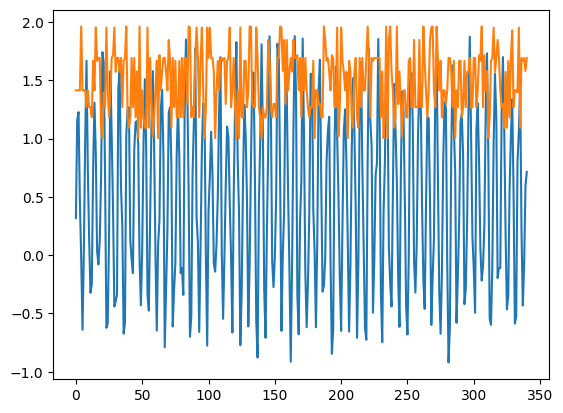

In [39]:
plt.plot(range(max_length)[:len(x0_raw)],embeddingx0[:len(x0_raw),0])
plt.plot(range(max_length)[:len(x0_raw)],embeddingx0[:len(x0_raw),1])
plt.show()